In [67]:
import numpy as np
import cv2
import os
import gc
import matplotlib.pyplot as plt
from skimage.feature import learn_gmm
from scipy.stats import norm

In [2]:
def get_videos_from_classes(dataset_path, classes_to_include):
    # Filter the classes to include only those in the provided list
    classes = [d for d in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, d)) and d in classes_to_include]

    # List all video files and their corresponding classes
    all_videos = []
    for class_name in classes:
        class_path = os.path.join(dataset_path, class_name)
        video_files = [f for f in os.listdir(class_path) if os.path.isfile(os.path.join(class_path, f))]
        for video_file in video_files:
            all_videos.append((os.path.join(class_path, video_file), class_name))

    return all_videos

def load_videos(video_list):
    # Initialize the lists for storing videos and labels
    X = []
    y = []

    for video_path, class_name in video_list:
        # Read the video using cv2
        cap = cv2.VideoCapture(video_path)
        if not cap.isOpened():
            print(f"Error opening video file {video_path}")
            continue

        frames = []
        # Process the video frame by frame
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break
            # Convert frame to grayscale
            frame_gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            frames.append(frame_gray)

        # Release the video capture object
        cap.release()

        # Store the frames and the corresponding label
        X.append(frames)
        y.append(class_name)

    return X, y



In [195]:
dataset_path = 'dataset/test'
classes_to_include = ['Skiing', 'Surfing', 'PullUps']  


video_list = get_videos_from_classes(dataset_path, classes_to_include)

X, y = load_videos(video_list)


print(f"Number of videos: {len(X)}")
if X:
    print(f"Shape of the first video: {len(X[0])} frames of size {X[0][0].shape}")


Number of videos: 46
Shape of the first video: 178 frames of size (240, 320)


In [224]:
gaussians = []
for video in X:
    intensities_dict = {}
    for frame in video:
        flattened_frame = frame.flatten()
        unique_values, counts = np.unique(flattened_frame, return_counts=True)
        for value, count in zip(unique_values, counts):
            if value in intensities_dict:
                intensities_dict[value] += count
            else:
                intensities_dict[value] = count
    break

intensities_dict

{0: 4217796,
 1: 1603161,
 2: 101313,
 3: 33279,
 4: 14282,
 5: 10435,
 6: 4382,
 7: 7739,
 8: 11513,
 9: 15559,
 10: 20341,
 11: 27961,
 12: 33506,
 13: 15916,
 14: 20993,
 15: 36278,
 16: 36991,
 17: 34830,
 18: 33847,
 19: 31289,
 20: 10605,
 21: 21481,
 22: 31273,
 23: 29862,
 24: 25612,
 25: 29742,
 26: 30355,
 27: 5785,
 28: 26524,
 29: 34148,
 30: 37062,
 31: 41849,
 32: 41122,
 33: 38264,
 34: 5759,
 35: 32126,
 36: 36611,
 37: 37244,
 38: 37868,
 39: 43461,
 40: 45712,
 41: 5327,
 42: 44774,
 43: 49977,
 44: 47456,
 45: 46788,
 46: 46605,
 47: 45900,
 48: 5110,
 49: 41343,
 50: 45147,
 51: 43731,
 52: 43818,
 53: 42859,
 54: 41510,
 55: 6024,
 56: 36252,
 57: 43077,
 58: 44760,
 59: 46974,
 60: 50220,
 61: 52694,
 62: 7701,
 63: 47208,
 64: 55312,
 65: 56434,
 66: 57437,
 67: 58596,
 68: 59364,
 69: 8898,
 70: 53805,
 71: 65593,
 72: 65335,
 73: 66370,
 74: 67327,
 75: 68317,
 76: 11561,
 77: 59175,
 78: 67347,
 79: 64777,
 80: 62502,
 81: 60032,
 82: 59731,
 83: 10017,
 84: 4

In [230]:
appended_intensities = []
for idx, value in enumerate(intensities_dict.values()):
    appended_intensities.extend([idx]*value)
appended_intensities = np.array(appended_intensities)
gmm = learn_gmm(appended_intensities.reshape((-1,1)),n_modes=6)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


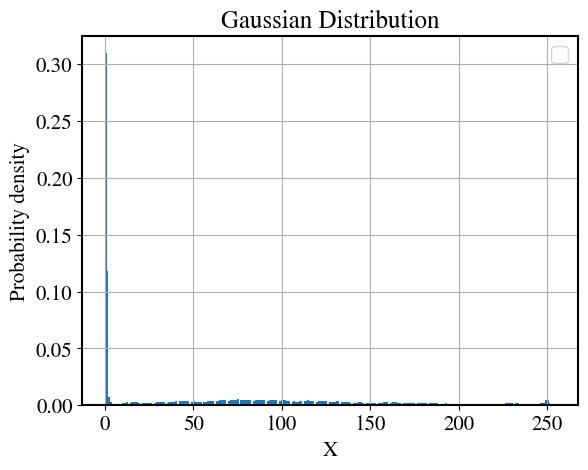

In [249]:
for mu,sigma,weight in zip(gmm.means_,gmm.covariances_ ** 0.5,gmm.weights_):
    x = np.linspace(0, 255, 300)
plt.hist(appended_intensities,range=(0,255),bins=256,density=True)
plt.title('Gaussian Distribution')
plt.xlabel('X')
plt.ylabel('Probability density')
plt.legend()
plt.grid(True)
plt.show()
